<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Processed Data</h4>
    <p style="font-size: 20px;">NBA API Data (1984-2024)</p>
</div>

<a name="EDAp"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Team Level Data](#1.-Team-Level-Data)**

- [1.1. Rolling Average Box Scores](#1.1.-Rolling-Average-Box-Scores)
  
**[2. Player Level Data](#2.-Player-Level-Data)**

# Setup

[Return to top](#EDAp)

In [1]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

# Data

[Return to top](#EDAp)

In [2]:
team_bs_matchups_roll_df = pd.read_csv('../data/processed/nba_team_matchups_rolling_stats_1984_2024.csv')

# convert 'GAME_DATE' column to datetime
team_bs_matchups_roll_df['GAME_DATE'] = pd.to_datetime(team_bs_matchups_roll_df['GAME_DATE'])

In [3]:
team_bs_matchups_roll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52101 entries, 0 to 52100
Data columns (total 94 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SEASON_ID               52101 non-null  int64         
 1   HOME_TEAM_ID            52101 non-null  int64         
 2   HOME_TEAM_ABBREVIATION  52101 non-null  object        
 3   HOME_TEAM_NAME          52101 non-null  object        
 4   GAME_ID                 52101 non-null  int64         
 5   GAME_DATE               52101 non-null  datetime64[ns]
 6   HOME_WL                 52098 non-null  object        
 7   HOME_MIN                52101 non-null  int64         
 8   HOME_PTS                52101 non-null  int64         
 9   HOME_FGM                52101 non-null  int64         
 10  HOME_FGA                52101 non-null  int64         
 11  HOME_FG_PCT             52101 non-null  float64       
 12  HOME_FG3M               52101 non-null  int64 

In [4]:
team_bs_matchups_roll_df.head()

,SEASON_ID,HOME_TEAM_ID,HOME_TEAM_ABBREVIATION,HOME_TEAM_NAME,GAME_ID,GAME_DATE,HOME_WL,HOME_MIN,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG_PCT,HOME_FG3M,HOME_FG3A,HOME_FG3_PCT,HOME_FTM,HOME_FTA,HOME_FT_PCT,HOME_OREB,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,...,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_HOME_PLUS_MINUS,ROLL_AWAY_MIN,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF,ROLL_AWAY_PLUS_MINUS
0,21983,1610612737,ATL,Atlanta Hawks,28300014,1983-10-29,W,240,117,49,94,0.521,0,1.0,0.0,19,30,0.633,27.0,21.0,48.0,28,14.0,7,23,...,NaN,NaN,NaN,NaN,NaN,240.300,112.150,43.100,89.5,0.483,10.850,29.650,0.368,15.100,20.550,0.723,12.100,32.050,44.150,27.800,6.850,5.650,11.2,18.600,-0.3
1,21983,1610612737,ATL,Atlanta Hawks,28300027,1983-11-01,W,240,95,38,81,0.469,0,0.0,NaN,19,30,0.633,12.0,29.0,41.0,20,7.0,10,16,...,14.000,7.0,23.00,35.0,NaN,240.000,105.500,39.000,81.5,0.478,0.000,2.000,0.000,27.500,35.000,0.782,12.500,30.500,43.000,26.500,8.500,3.000,22.0,33.500,NaN
2,21983,1610612737,ATL,Atlanta Hawks,28300041,1983-11-04,W,240,103,42,86,0.488,1,1.0,1.0,18,26,0.692,19.0,27.0,46.0,31,14.0,13,18,...,10.500,8.5,19.50,34.5,NaN,240.000,99.000,37.000,99.5,0.373,1.500,4.500,0.375,23.500,31.000,0.754,20.000,27.000,47.000,18.500,10.500,6.500,18.5,30.500,NaN
3,21983,1610612737,ATL,Atlanta Hawks,28300101,1983-11-15,W,240,107,45,84,0.536,0,0.0,NaN,17,21,0.810,17.0,24.0,41.0,24,7.0,10,18,...,11.667,10.0,19.00,32.0,NaN,246.167,110.167,44.667,91.5,0.489,0.667,1.833,0.400,20.167,28.833,0.701,14.333,26.833,41.167,24.167,9.667,4.333,17.0,27.333,NaN
4,21983,1610612737,ATL,Atlanta Hawks,28300112,1983-11-17,W,240,99,35,66,0.530,1,2.0,0.5,28,40,0.700,10.0,35.0,45.0,20,5.0,12,23,...,10.500,10.0,18.75,30.5,NaN,248.333,119.667,44.667,88.0,0.508,0.667,1.000,0.750,29.667,40.000,0.742,16.000,27.667,43.667,26.667,11.667,6.667,20.0,25.667,NaN


In [5]:
team_bs_matchups_roll_df.describe()

,SEASON_ID,HOME_TEAM_ID,GAME_ID,GAME_DATE,HOME_MIN,HOME_PTS,HOME_FGM,HOME_FGA,HOME_FG_PCT,HOME_FG3M,HOME_FG3A,HOME_FG3_PCT,HOME_FTM,HOME_FTA,HOME_FT_PCT,HOME_OREB,HOME_DREB,HOME_REB,HOME_AST,HOME_STL,HOME_BLK,HOME_TOV,HOME_PF,HOME_PLUS_MINUS,AWAY_TEAM_ID,...,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_HOME_PLUS_MINUS,ROLL_AWAY_MIN,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,ROLL_AWAY_FTM,ROLL_AWAY_FTA,ROLL_AWAY_FT_PCT,ROLL_AWAY_OREB,ROLL_AWAY_DREB,ROLL_AWAY_REB,ROLL_AWAY_AST,ROLL_AWAY_STL,ROLL_AWAY_BLK,ROLL_AWAY_TOV,ROLL_AWAY_PF,ROLL_AWAY_PLUS_MINUS
count,52101.000,5.210e+04,5.210e+04,52101,52101.000,52101.000,52101.000,52101.000,52101.000,52101.00,52100.000,51484.000,52101.000,52101.000,52099.000,52098.000,52098.000,52101.000,52101.000,52100.000,52101.000,52101.000,52101.000,37261.000,5.210e+04,...,52100.000,52100.000,52100.000,52100.000,37592.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52095.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,52100.000,37593.000
mean,22881.387,1.611e+09,5.805e+07,2005-02-11 14:31:23.434099200,240.466,103.698,38.866,83.498,0.466,6.29,17.681,0.343,19.676,25.997,0.757,12.095,31.263,43.359,23.642,7.979,5.301,14.395,21.615,2.819,1.611e+09,...,7.991,5.304,14.426,21.656,2.810,240.438,100.358,37.756,83.308,0.454,6.111,17.560,0.333,18.734,24.839,0.755,11.704,30.090,41.797,21.897,7.847,4.683,14.830,22.440,-2.823
min,12003.000,1.611e+09,1.030e+07,1983-10-28 00:00:00,-1.000,0.000,0.000,1.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-68.000,1.611e+09,...,3.000,1.000,8.750,14.750,-29.000,60.000,61.000,24.000,65.750,0.337,0.000,0.000,0.000,10.900,13.000,0.571,6.000,18.000,28.000,5.000,4.000,1.000,7.000,14.750,-29.000
25%,21994.000,1.611e+09,2.090e+07,1995-04-02 00:00:00,240.000,94.000,35.000,78.000,0.425,3.00,10.000,0.256,15.000,20.000,0.696,9.000,27.000,39.000,20.000,6.000,3.000,11.000,18.000,-7.000,1.611e+09,...,7.100,4.450,13.250,20.050,-0.670,240.000,94.750,35.350,79.700,0.439,3.500,10.600,0.316,16.850,22.400,0.733,10.250,28.200,40.100,19.950,7.100,4.050,13.500,20.700,-6.050
50%,22005.000,1.611e+09,2.200e+07,2005-12-28 00:00:00,240.000,103.000,39.000,83.000,0.465,6.00,16.000,0.345,19.000,25.000,0.763,12.000,31.000,43.000,23.000,8.000,5.000,14.000,21.000,4.000,1.611e+09,...,7.900,5.150,14.300,21.500,3.050,241.200,99.650,37.450,83.150,0.453,5.750,16.500,0.342,18.500,24.650,0.756,11.550,29.850,41.750,21.700,7.750,4.650,14.650,22.250,-2.750
75%,22015.000,1.611e+09,2.920e+07,2015-01-02 00:00:00,240.000,113.000,43.000,89.000,0.506,9.00,24.000,0.429,24.000,31.000,0.825,15.000,35.000,48.000,27.000,10.000,7.000,17.000,25.000,11.000,1.611e+09,...,8.750,6.000,15.500,23.100,6.500,242.500,105.650,40.050,86.650,0.468,8.300,23.400,0.364,20.400,27.050,0.779,13.000,31.800,43.350,23.700,8.600,5.250,15.950,24.050,0.500
max,62023.000,1.611e+09,1.622e+09,2024-01-21 00:00:00,688.000,184.000,68.000,135.000,0.833,28.00,70.000,2.000,61.000,80.000,1.000,37.000,55.000,77.000,50.000,27.000,23.000,39.000,45.000,73.000,1.611e+09,...,18.000,15.500,26.000,37.000,29.000,265.000,129.500,50.450,111.500,0.563,17.850,49.900,1.000,51.000,53.000,1.000,26.500,43.350,57.000,33.500,14.000,10.000,29.000,38.000,29.000
std,5186.768,8.567e+00,2.191e+08,NaN,12.120,14.052,6.116,8.783,0.059,4.47,10.747,0.156,6.795,8.419,0.099,4.433,5.656,6.879,5.736,3.099,2.759,4.152,4.730,13.416,8.571e+00,...,1.238,1.263,1.719,2.246,5.281,3.773,7.556,3.185,4.843,0.022,3.524,9.593,0.051,2.621,3.377,0.035,1.997,2.644,2.457,2.653,1.110,0.915,1.895,2.485,4.832


<a name="1.-Team-Level-Data"></a>
# 1. Team Level Data

[Return to top](#EDAp)

<a name="1.1.-Rolling-Average-Box-Scores"></a>
## 1.1. Rolling Average Box Scores

[Return to top](#EDAp)

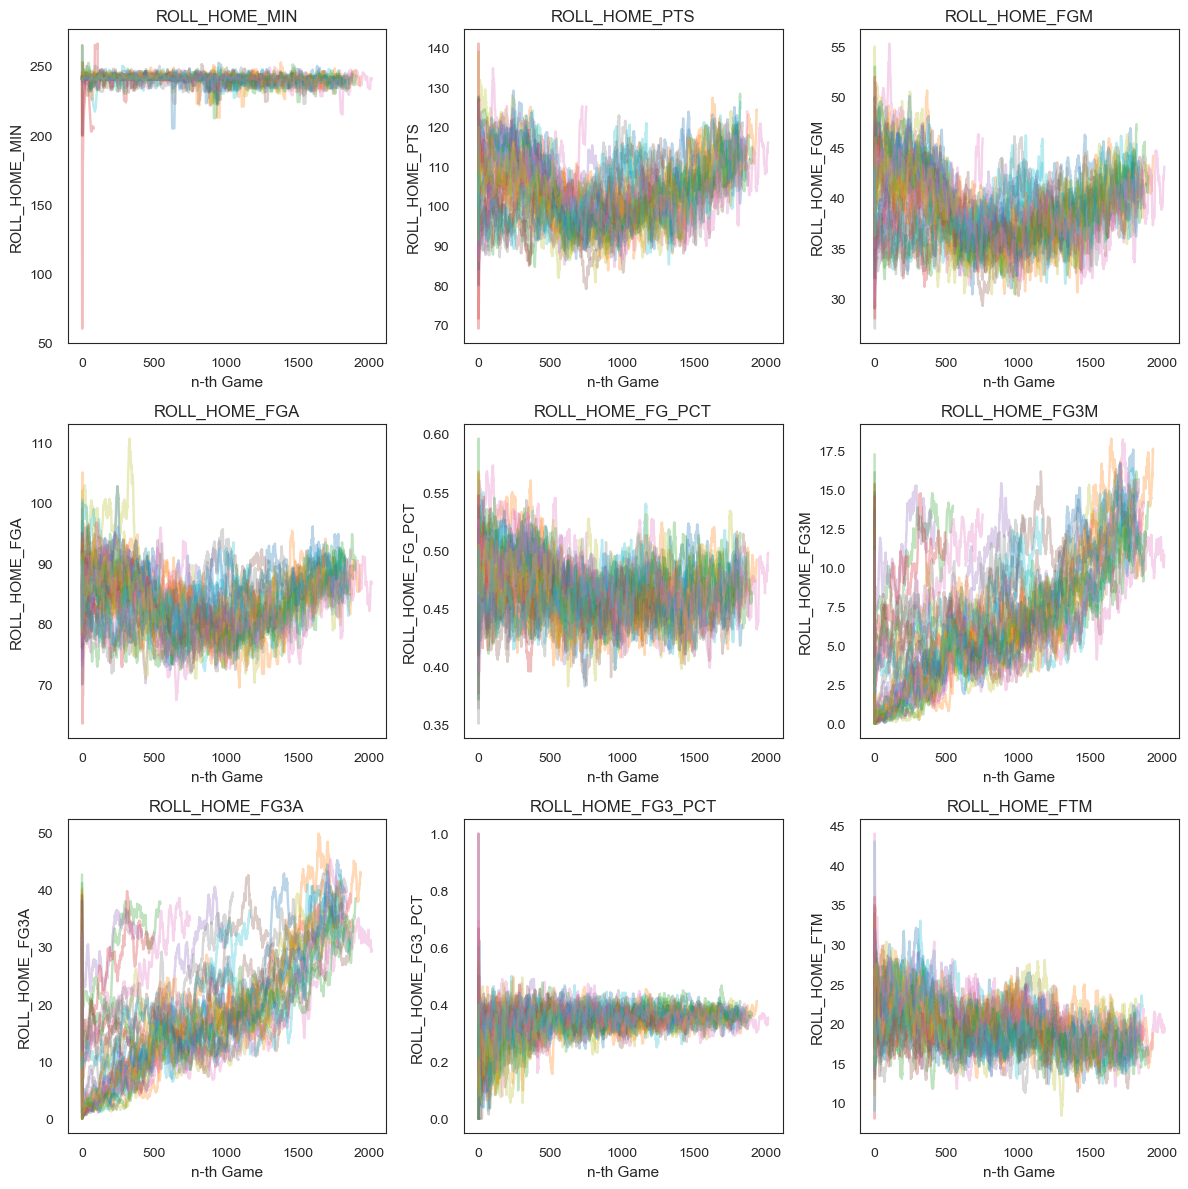

In [6]:
# plot for Home Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'HOME_TEAM_NAME', 'ROLL_HOME_')

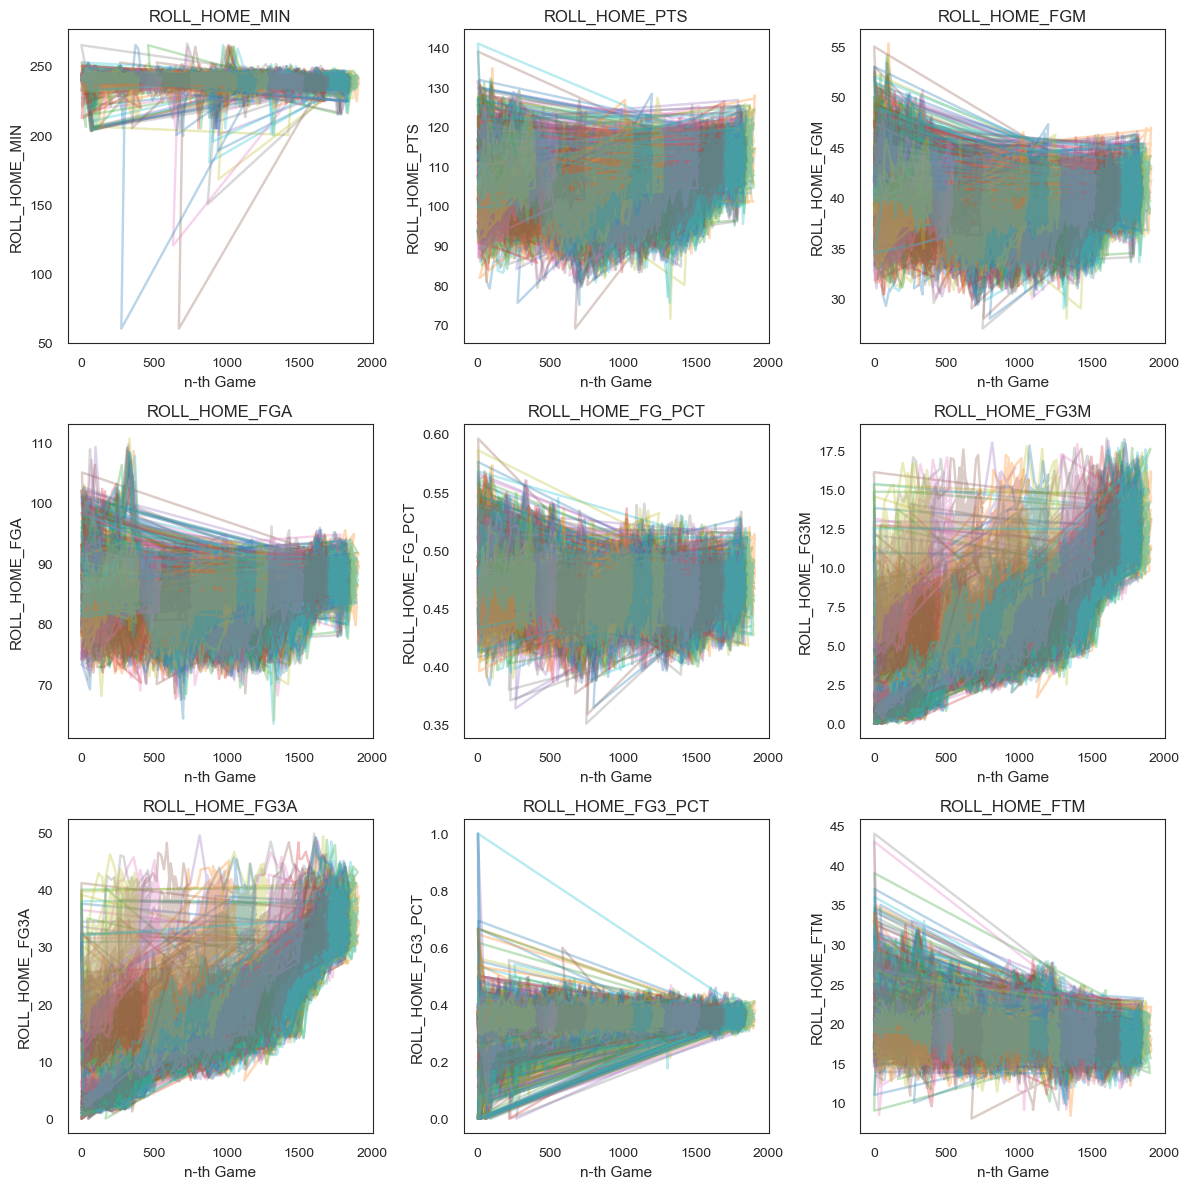

In [7]:
# plot for Away Teams
utl.plot_team_bs_stats(team_bs_matchups_roll_df, 'AWAY_TEAM_NAME', 'ROLL_HOME_')

<a name="2.-Player-Level-Data"></a>
# 2. Player Level Data

[Return to top](#EDAp)